<font size=8 color=red><b>Feature Engineeering</font>

In [403]:
import os
import re
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import isnan
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer  
from statistics import mode 
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
# use tensorflow as backend

from IPython.display import display, Markdown, Image

In [404]:
sys.path.insert(0, f"C:\classes\pdm\Classes")
from menu_A_a_data_utility import DataUtility

# A. Introduction

Feature engineering efforts mainly have two goals:
* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

特征工程工作主要有两个目标：
* 准备合适的输入数据集，与机器学习算法要求兼容。
* 提高机器学习模型的性能。

We spend 60% of our time in EDA and Featuring Engineering <br>
60% 的时间用于 EDA 和 特征工程


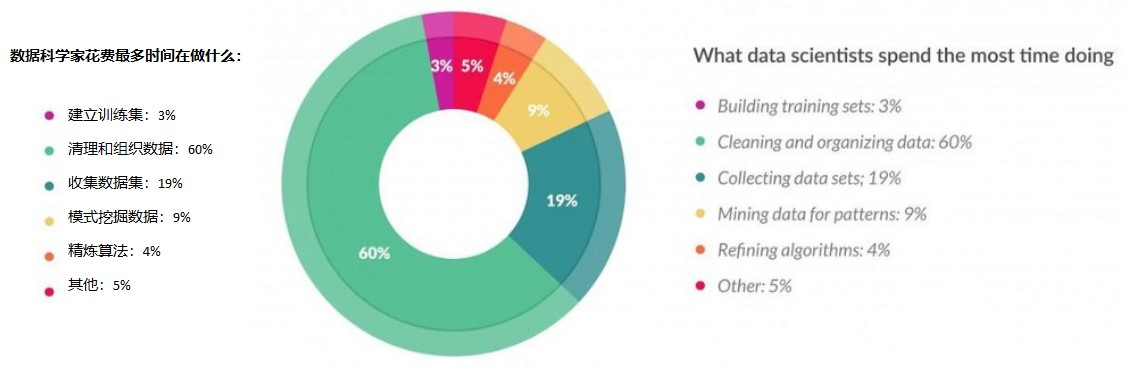

In [405]:
gif_path = os.path.dirname(os.getcwd()) + '/Classes/gifs/time_for_ds.jpg'
Image(gif_path)   

# B. Load Data 上载数据

In [406]:
du = DataUtility()
DF_TRAIN, DF_TEST, DF_RESULT = du.prepare_dfs()

* for those with working conda, please try the following
* conda 环境能运行的，课下可以熟悉熟悉下面的工具

In [ ]:
!pip install pandasgui 

In [407]:
from pandasgui import show

In [408]:
show(DF_TRAIN)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


# C. Techniques 技巧
`List of Commons Techniques`

Common Techniques
1. Imputation
2. Handling Outliers
3. Binning
4. Transformation and Scaling
5. Categorical: Ordinal, Nominal 
6. Grouping Operations
7. Feature Split 
9. Extracting Date

常用操作：

1. 插补
2. 处理异常值
3. 分箱
4. 对数变换
5. One-Hot 编码
6. 分组操作
7. 特征分割 
9. 提取日期

Advanced Techniques：
1. IterativeImputer
2. IsolationForest
3. MissForest from missingpy
4. Time series feature engineering: lag, rolling, expanding etc.  

其他操作：
1. 迭代估算器
2. IsolationForest 隔离森林
3. MissForest 
4.时间序列特征工程：滞后、滚动、扩展等。 


## Prepare Data 准备数据
* Create a data set for demo 

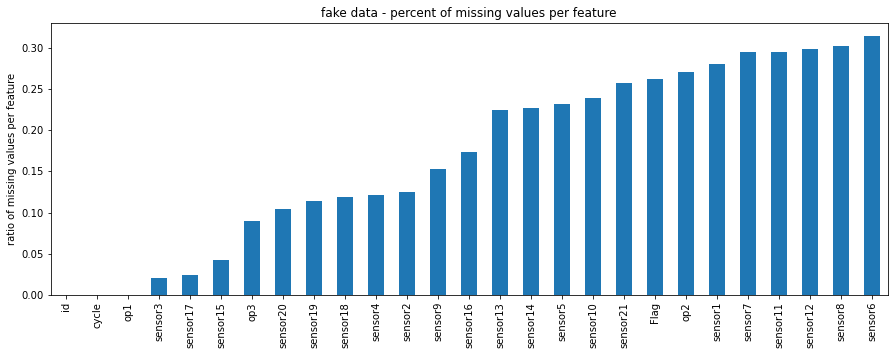

In [34]:
def create_demo_data(upper_limit):
    # upper_limit: percent of "masked" -- > None
    # prepare a fake data set 
    if upper_limit > 1:
        upper_limit = upper_limit/100
         
    tmp = DF_TRAIN.copy()  
    len_col = tmp.shape[0]  
    
    for c in list(tmp)[3:]:
        p = np.random.uniform(low = 0.0,high = upper_limit, size = None) # size int or tuple
        num = np.zeros(len_col) 
        #tfs = np.random.choice([True, False], size=num.shape, p=[p,1-p])
        tfs = np.random.choice([True, False], size=len_col, p=[p,1-p])
        tmp[c] = tmp[c].mask(tfs)  
     
    tmp.isna().mean().sort_values().plot(
        kind="bar", figsize=(15,5), 
        title = "fake data - percent of missing values per feature", 
        ylabel = "ratio of missing values per feature")
    plt.show()
    
    return tmp 

TMP = create_demo_data(33.0)

## C1. Imputation 插补
* handling missing data 

### C1.1. drop missing 删除

In [13]:
tmp = TMP.copy()
print("before dropping", tmp.shape)
threshold = 0.2
#Dropping columns with missing value rate higher than threshold
tmp = tmp[tmp.columns[tmp.isnull().mean() < threshold]] 
#Dropping rows with missing value rate higher than threshold
tmp = tmp.loc[tmp.isnull().mean(axis=1) < threshold]
print("after dropping", tmp.shape)

before dropping (160359, 27)
after dropping (149894, 18)


### C1.2. Fill it 填补

`Numericals 连续数值`
* simple stats, mode, and knn

In [14]:
tmp = TMP.copy()
tmp2 = TMP.copy()
tmp = tmp.select_dtypes(include = "number") 
columns = tmp.columns
# defining the imputer
imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean')
# sklearn will calculate for each column
#stateby: mean, median, most_frequent and constant. defaykt us mean 

# transform the dataset
tmp = pd.DataFrame(imputer.fit_transform(tmp))
tmp.columns = columns 

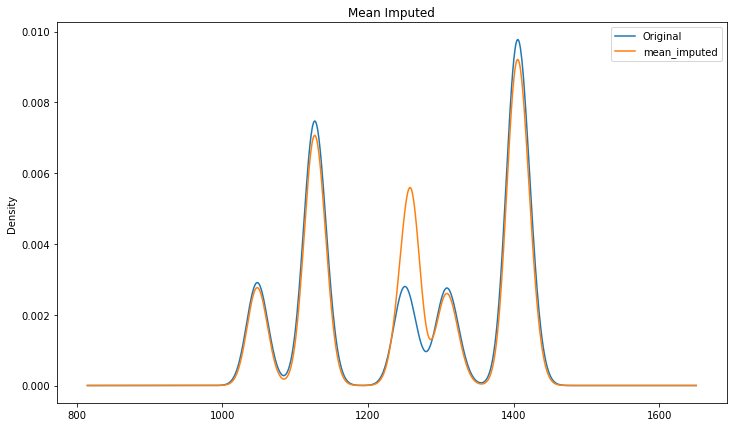

In [15]:
col = "sensor4" 
tmp_plot = pd.DataFrame({"Original": list(tmp2[col]), "mean_imputed": list(tmp[col])})
tmp_plot.plot(kind="kde", figsize = (12,7), title = "Mean Imputed")
plt.show()

In [16]:
# mode:
tmp = TMP.copy()
col = 'sensor4' 
tmp[col] = tmp[col].fillna(tmp[col].mode()[0])

In [24]:
# KNN
tmp = TMP.copy()
tmp = tmp.sample(1000)
tmp2 = tmp.copy() 
tmp = tmp.select_dtypes(include = "number") 
columns = tmp.columns
# defining the imputer
imputer = KNNImputer(n_neighbors=2)  
# sklearn will calculate for each column
#stateby: mean, median, most_frequent and constant. defaykt us mean 
 
# transform the dataset
tmp = pd.DataFrame(imputer.fit_transform(tmp))
tmp.columns = columns 

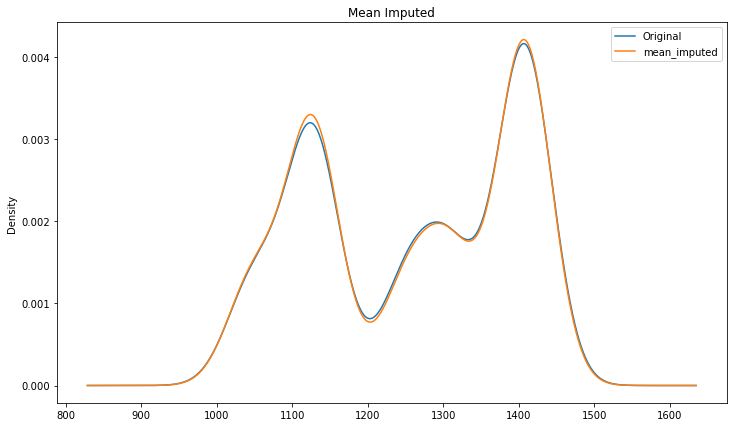

In [25]:
col = "sensor4" 
tmp_plot = pd.DataFrame({"Original": list(tmp2[col]), "mean_imputed": list(tmp[col])})
tmp_plot.plot(kind="kde", figsize = (12,7), title = "Mean Imputed")
plt.show()

`categorical 分类特征`
* most common

In [ ]:
tmp = TMP.copy()

In [ ]:
tmp['Flag'].fillna(tmp['Flag'].value_counts().idxmax(), inplace=True) 

`other method: ffill, bfill etc.`

In [ ]:
#method : {'backfill', 'bfill', 'pad', 'ffill', None}


In [26]:
import pandas as pd
# Creating the dataframe
df = pd.DataFrame({"A":[12, 4, 7, None, 2],
                   "B":[None, 3, 57, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})

In [27]:
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,3.0,16.0,3.0
2,7.0,57.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,2.0,NaN,8.0,6.0


In [28]:
df.interpolate(method ='linear', limit_direction ='forward')

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,3.0,16.0,3.0
2,7.0,57.0,9.5,4.0
3,4.5,3.0,3.0,5.0
4,2.0,3.0,8.0,6.0


#### C1.3.: Interpolation
* used to fill series of data, e.g., image, time series etc. 
* in series data: 
    1. Linear Interpolation
    2. Polynomial Interpolation
    3. Interpolation through Padding
* data frame: 
    1. Linear Interpolation
    2. Polynomial Interpolation
    3. Interpolation through Padding
* time series

#### C1.3.1: concept
* just connect two straight line

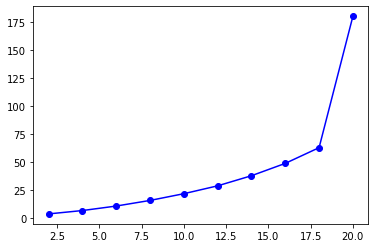

array(121.5)

In [37]:
import scipy.interpolate

x = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
y = [4, 7, 11, 16, 22, 29, 38, 49, 63, 180]

plt.plot(x,y, "-ob")
plt.show()
y_interp = scipy.interpolate.interp1d(x, y)

y = y_interp(19)
y

#### 1.4.1. Polynomial Interpolation 

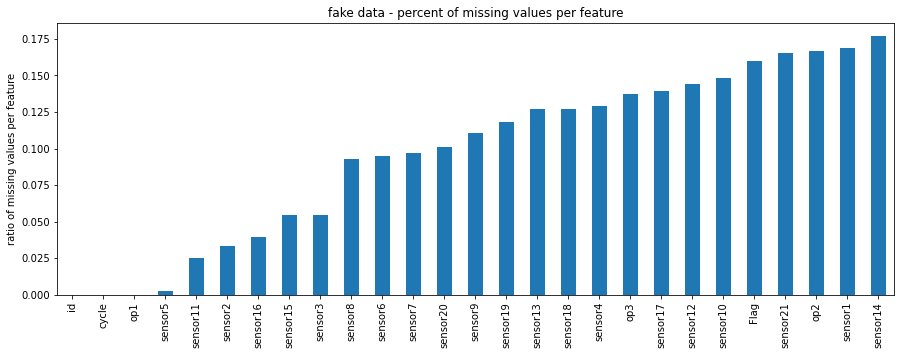

In [99]:
# preapare a nan data
TMP = create_demo_data(0.2)

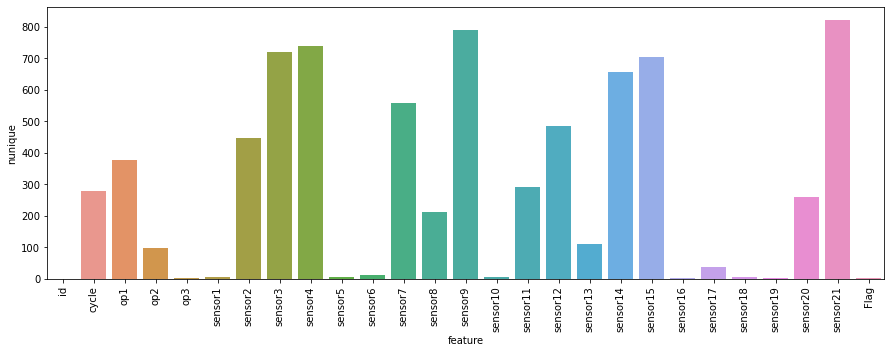

In [79]:
nu = tmp.nunique().reset_index()
nu.columns = ['feature','nunique']
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='feature', y='nunique',   data=nu)
for item in ax.get_xticklabels():
    item.set_rotation(90)

* linear

In [126]:
tmp = TMP.copy() 
tmp =tmp.interpolate(method ='linear', limit_direction ='forward')

* by order
* e.g.: a.interpolate(method="polynomial", order=2)
* use second order. two data points are needed

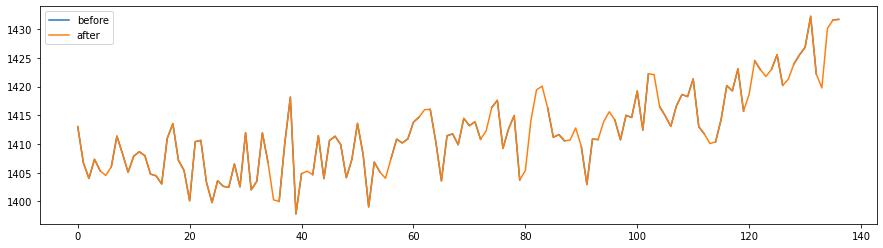

In [101]:
tmp = TMP.copy()
tmp = tmp[(tmp["id"]==23)&(tmp["Flag"]=="FD001")]
tmp_sensor4 = tmp["sensor4"]  
interpolated = tmp_sensor4.interpolate(method="polynomial", order=2) 
df_inter = pd.concat([tmp_sensor4, interpolated], axis=1)
df_inter.columns=["before", "after"]
df_inter = df_inter.reset_index(drop=True)
df_inter.plot(kind="line", figsize=(15,4)) 
plt.show()

* pad
* e.g.. a.interpolate(method="pad", limit=2)
* uses previous number. and fill 2 maximum

In [121]:
tmp = TMP.copy()
tmp = tmp[(tmp["id"]==22) &(tmp["Flag"]=="FD001")]
tmp = tmp["sensor13"]
tmp = tmp.interpolate(method="pad", limit = 3)  # how many continuous null to fill 

In [113]:
tmp["sensor13"].interpolate(method="pad", limit = 3).isnull().sum()

0

* polynomial methods

1. Lagrange Polynomial Interpolation
2. Newton Polynomial Interpolation, also called Newton’s divided differences interpolation polynomial
3. Spline Interpolation and more specifically Cubic Spline Interpolation


In [ ]:
degree_3_polynomial = lambda x: 1 + x + x**2 + x**3
plt.plot(x, [degree_3_polynomial(i) for i in x])

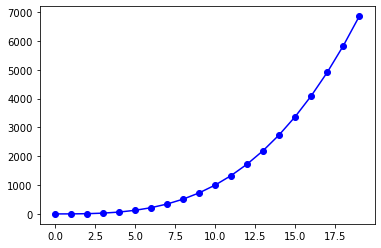

In [47]:
x = [i for i in range(20)]
y = [np.power(i, 3) for i in x]
 
plt.plot(x,y, '-ob')

* Advanced:  
* Lagrange Polynomial Interpolation, Newton Polynomial Interpolation, and Spline Interpolation
* for polynomial interpolation, there is only ONE polynomial interpolation. 
* both Lagrange and Newton produce the same result, both produce the smallest order. the difference is the computational cost/approach
* $ \ell ~ \boldsymbol\ell $
* $\sum\limits_{\substack{i=0 \\ i\neq 4}}^n i$
* more on: https://towardsdatascience.com/polynomial-interpolation-3463ea4b63dd

* time series fill

In [ ]:
tmp = TMP.copy()
tmp = tmp[tmp["Flag"]=="FD001"]
tmp = tmp[tmp["id"]==43] 
pd.TimeSeries = pd.Series 
ts = pd.TimeSeries(tmp, index="cycle")


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

values = [271238, 329285, -1, 260260, 263711]
timestamps = pd.to_datetime(['2015-01-04 08:29:05',
                             '2015-01-04 08:34:05',
                             '2015-01-04 08:39:05',
                             '2015-01-04 08:44:05',
                             '2015-01-04 08:49:05'])

ts = pd.Series(values, index=timestamps)
ts[ts==-1] = np.nan
ts = ts.resample('T').mean()

ts.interpolate(method='spline', order=3).plot()
ts.interpolate(method='time').plot()
lines, labels = plt.gca().get_legend_handles_labels()
labels = ['spline', 'time']
plt.legend(lines, labels, loc='best')
plt.show()

* rich interpolate of pandas
* DataFrame.interpolate(method=’linear’, axis=0, limit=None, inplace=False, limit_direction=’forward’, limit_area=None, downcast=None, **kwargs)
* method : {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’}

In [ ]:

ts.interpolate(method='cubic', downcast='infer')

#### C1.5.1 Categorical

In [16]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

## C2. Handle Anomalies 异常值处理
will study more at later part. 后面课程会深入学习
* anomalies can be grouped into 
    1. outliers
    2. change in events
    3. drifts
* in our case, more on outliers. 
* for univariate, conventional stats and eda will expose outliers

### C2.1. Unsupervised way
    1. Isolation Forest
    2. luminaire
    2. Local Outlier Factor
    3. Robust Covariance
    4. One-Class SVM
    5. One-Class SVM (SGD)

#### C2.1.1 isolation forest
 

In [450]:
tmp = DF_TRAIN.copy() 
to_model_columns=tmp.columns[5:26]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(tmp[to_model_columns])
pred = clf.predict(tmp[to_model_columns])
tmp['anomaly']=pred
outliers=tmp.loc[tmp['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(tmp['anomaly'].value_counts())

 1    141116
-1     19243
Name: anomaly, dtype: int64


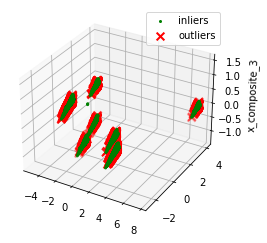

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(tmp[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

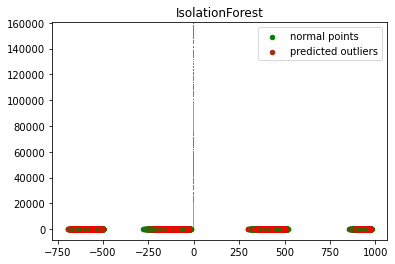

In [31]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(tmp[to_model_columns])
res=pd.DataFrame(pca.transform(tmp[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

* e.g., stock market

In [463]:
import yfinance as yf
data = yf.download("SPY", start="2017-01-01", end="2021-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,225.039993,225.830002,223.880005,225.240005,203.788040,91366500
2017-01-04 00:00:00-05:00,225.619995,226.750000,225.610001,226.580002,205.000412,78744400
2017-01-05 00:00:00-05:00,226.270004,226.580002,225.479996,226.399994,204.837555,78379000
2017-01-06 00:00:00-05:00,226.529999,227.750000,225.899994,227.210007,205.570435,71559900
2017-01-09 00:00:00-05:00,226.910004,227.070007,226.419998,226.460007,204.891830,46939700


In [464]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(data['Adj Close'].values)

# Call it KF_mean
data['KF_mean'] = np.array(state_means)
data.head()

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2017-01-03 00:00:00-05:00,225.039993,225.830002,223.880005,225.240005,203.788040,91366500,101.894020
2017-01-04 00:00:00-05:00,225.619995,226.750000,225.610001,226.580002,205.000412,78744400,136.718033
2017-01-05 00:00:00-05:00,226.270004,226.580002,225.479996,226.399994,204.837555,78379000,154.294349
2017-01-06 00:00:00-05:00,226.529999,227.750000,225.899994,227.210007,205.570435,71559900,165.132574
2017-01-09 00:00:00-05:00,226.910004,227.070007,226.419998,226.460007,204.891830,46939700,172.338831


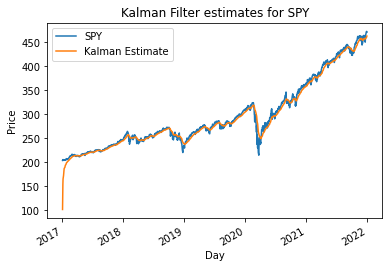

In [465]:
data[['Adj Close','KF_mean']].plot()
plt.title('Kalman Filter estimates for SPY')
plt.legend(['SPY','Kalman Estimate'])
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

## C3. Bining 分箱 
* main purpose of binning is to have more robust model and reduce overfitting. 分箱的主要目的是拥有更健壮的模型并减少过拟合分箱的主要目的是拥有更健壮的模型并减少过拟合
* applies to both categorical and numerical 适用于分类和数值适用于分类和数值
* method -- between&loc, cut 方法

In [12]:
tmp = DF_TRAIN.copy() 

### C3.1: continues loc/cut /qcut

In [477]:
# loc and between  
# syntax: (left, right, inclusive). inclusive takes one of the { both, neither, left, right } values
tmp["bin_cycle"]="D"
tmp.loc[tmp['cycle'].between(0, 50, 'both'), 'bin_cycle'] = 'C'
tmp.loc[tmp['cycle'].between(50, 80, 'right'), 'bin_cycle'] = 'B'
tmp.loc[tmp['cycle'].between(80, 100, 'right'), 'bin_cycle'] = 'A'
tmp["bin_cycle"].value_counts()

D    89459
C    35450
B    21270
A    14180
Name: bin_cycle, dtype: int64

In [503]:
# cut 
tmp = DF_TRAIN.copy() 
tmp['bin_cycle'] = pd.cut(tmp['cycle'], bins=[0,30,70,100], include_lowest=True,right=False, labels=["Low", "Mid", "High"])

In [505]:
tmp

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Flag,bin_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001,Low
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,FD001,Low
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,FD001,Low
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,FD001,Low
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,FD001,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,FD004,NaN
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,FD004,NaN
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,FD004,NaN
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,FD004,NaN


In [543]:
tmp = DF_TRAIN.copy()
tmp["with_bin"] = pd.cut(tmp['cycle'], bins=[0,30,70,1100], labels = ["Low", "Medium", "High"],  retbins = False) 
tmp

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Flag,with_bin
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001,Low
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,FD001,Low
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,FD001,Low
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,FD001,Low
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,FD001,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,FD004,High
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,FD004,High
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,FD004,High
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,FD004,High


In [ ]:
#qcut Quantile-based discretization function.Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
tmp = DF_TRAIN.copy()  
tmp["qcut"] = pd.qcut(tmp["cycle"], 4, labels=False)
tmp.head(2)

In [562]:
 
tmp["qcut"] = pd.qcut(tmp["cycle"], 10, retbins = False) 
tmp.groupby("qcut")["id"].count() 

qcut
(0.999, 23.0]     16307
(23.0, 46.0]      16307
(46.0, 68.0]      15598
(68.0, 91.0]      16307
(91.0, 114.0]     16307
(114.0, 136.0]    15555
(136.0, 160.0]    16162
(160.0, 188.0]    15798
(188.0, 234.0]    16043
(234.0, 543.0]    15975
Name: id, dtype: int64

### C3.2: Categorical  

In [28]:
# for categorical
tmp = DF_TRAIN.copy()
# populate countries 
list_of_engines = ["turbofan","turboprop","turboshaft","turboprop"]

conditions = [
    tmp['Flag'].str.contains('001'),
    tmp['Flag'].str.contains('002'),
    tmp['Flag'].str.contains('003'),
    tmp['Flag'].str.contains('004')] 

tmp["EngineType"] = np.select(conditions, list_of_engines, default='Other') 
tmp["EngineType"].value_counts()


turboprop     115008
turboshaft     24720
turbofan       20631
Name: EngineType, dtype: int64

## C4. Transformation and Scaling 转换和扩展转换和扩展
**Main purpose**<br>
    1. make skewed to be more normal<br>
    2. some data are collected/process from a multiplitive process. <br>
    3. also reduce impact of outliers<br>
    4. difference between Log Transformation and Scaling: scaling change the range; transformation change the shape 
    5. difference between normalization and scaling

* Log Transformation / Power Transformer Scaler
* MinMax Scaler
* Standard Scaler
* MaxAbsScaler
* Robust Scaler
* Quantile Transformer Scaler  
* Unit Vector Scaler/Normalizer
 
 * https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

### C4.1 Log / power

In [217]:
from sklearn.preprocessing import PowerTransformer
# Box Cox is used to stabilize the variance (eliminate heteroskedasticity) and transform non-normal dependent variables to a normal shape.
def log_transform(col):
    tmp = DF_TRAIN.copy()
    tmp = tmp[tmp["Flag"]=="FD001"]
    tmp[f"{col}_log"]= tmp[col].transform(np.log1p) # if with zero: np.log1p(x-x.min())
    
    #pt = PowerTransformer()
    pt = PowerTransformer(method="box-cox")
    # PowerTranformer methods : {'yeo-johnson', 'box-cox'}, default='yeo-johnson'
    
    tmp[[f"{col}_pow"]] = pd.DataFrame(pt.fit_transform(tmp[[col]].values))
    ## labdas  pt.lambdas_
     
    fig, axes = plt.subplots(1,3, figsize=(15,5))
  
    sns.histplot(data=tmp, x=f"{col}_log", kde=True, ax=axes[0])
    axes[0].set_title(f"{col}_log")
    sns.histplot(data=tmp, x=f"{col}", kde=True, ax=axes[1])
    axes[1].set_title(f"{col}")
    sns.histplot(data=tmp, x=f"{col}_pow", kde=True, ax=axes[2])
    axes[2].set_title(f"{col}_pow")
 
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.set(xlabel=None)
         
    plt.tight_layout()
    plt.show()
    #tmp[f"{col}_log"].plot.kde()

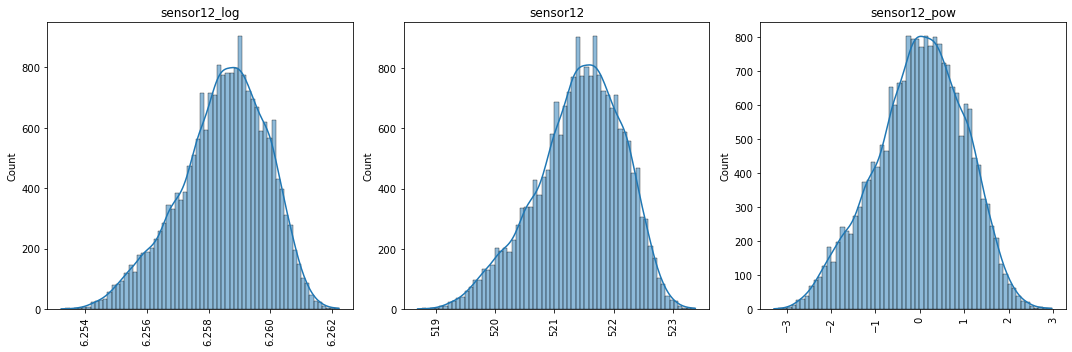

In [307]:
log_transform("sensor12") 

**cox-box transformation** <br><br>

<font size=4>
$
x^{\prime}_{i} = \left\{
    \begin{array}\\
        \frac{x^{\lambda}_{i}-1}{\lambda} & \mbox{if } \ \lambda \neq 0  \\ 
        ln(x_{i}) & \mbox{if } \lambda = 0
    \end{array}
\right.
$
</font>




λ: Transformation <br>
    -2: x'= 1/x2 <br>
    -1: x' = 1/x <br>
    -0.5: x' = 1/SQRT(x) <br>
    0: x' = LOG(x) <br>
    0.5: x' = SQRT(x) <br>
    1: x' = x <br>
    2: x' = x2

### C4.2. Robust Scaler
* robust to outlier
* Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

<font size=4>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x^{\prime}_{i} = \frac{x_{i} - Q_{1}(x)}{Q_3(x) - Q_{1}(x)}$   
</font>

In [238]:
from sklearn.preprocessing import RobustScaler  

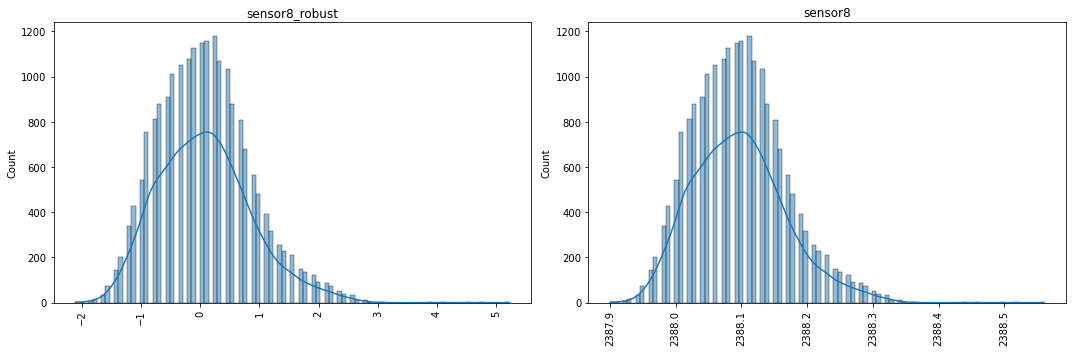

In [311]:
def scale_robust(col):
    tmp = DF_TRAIN.copy()
    tmp = tmp[tmp["Flag"]=="FD001"] 
    scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
    tmp[[f"{col}_robust"]] = scaler.fit_transform(tmp[[col]].values)
       
    fig, axes = plt.subplots(1,2, figsize=(15,5))
  
    sns.histplot(data=tmp, x=f"{col}_robust", kde=True, ax=axes[0])
    axes[0].set_title(f"{col}_robust")
    sns.histplot(data=tmp, x=f"{col}", kde=True, ax=axes[1])
    axes[1].set_title(f"{col}") 
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.set(xlabel=None)
         
    plt.tight_layout()
    plt.show()
    #tmp[f"{col}_log"].plot.kde()
    return tmp,scaler

tmp2,scaler = scale_robust("sensor8")

In [ ]:
B = plt.boxplot(tmp2["sensor12"])
[item.get_ydata() for item in B['whiskers']]
B = plt.boxplot(tmp2["sensor12_robust"])
[item.get_ydata() for item in B['whiskers']]
sns.kdeplot(data=abcd[["sensor12_robust", "sensor12"]])

### C4.3: QuantileTransformer
* spread frequent values

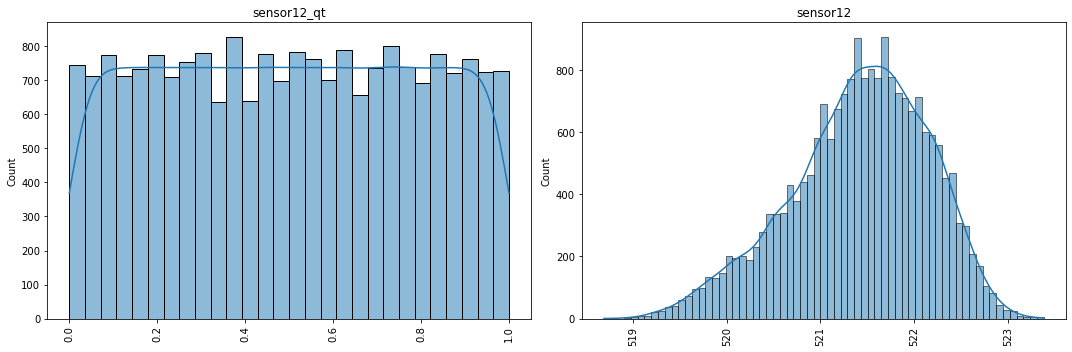

In [315]:
from sklearn.preprocessing import QuantileTransformer

def qt_transform(col):
    tmp = DF_TRAIN.copy()
    tmp = tmp[tmp["Flag"]=="FD001"] 
    qt = QuantileTransformer(n_quantiles=1000, output_distribution='uniform')
 
    tmp[[f"{col}_qt"]] = pd.DataFrame(qt.fit_transform(tmp[[col]].values))
    ## labdas  pt.lambdas_
     
    fig, axes = plt.subplots(1,2, figsize=(15,5))
  
    sns.histplot(data=tmp, x=f"{col}_qt", kde=True, ax=axes[0])
    axes[0].set_title(f"{col}_qt")
    sns.histplot(data=tmp, x=f"{col}", kde=True, ax=axes[1])
    axes[1].set_title(f"{col}") 
 
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.set(xlabel=None)
         
    plt.tight_layout()
    plt.show()
    #tmp[f"{col}_log"].plot.kde()
     
qt_transform("sensor12") 

     

In [329]:
tmp = DF_TRAIN.copy()
tmp = tmp[tmp["Flag"]=="FD001"] 

qt = QuantileTransformer(n_quantiles=500, output_distribution='uniform')
 
tmp[[f"{col}_qt"]] = pd.DataFrame(qt.fit_transform(tmp[[col]].values))

tmp = tmp[["sensor12", "sensor12_qt"]]



,sensor12,sensor12_qt
0,521.66,0.597194
1,522.28,0.887776
2,522.42,0.930862
3,522.86,0.993320
4,522.19,0.850701
...,...,...
20626,519.49,0.007682
20627,519.68,0.016700
20628,520.01,0.046092
20629,519.67,0.016032


## C5: Categorical Data
* Ordinal and Nominal

In [385]:
from sklearn.preprocessing import OneHotEncoder 
# let's encode Flag 
   

def get_cate(df):
    tmp = df.copy()
    tmp.reset_index(drop=True, inplace=True)
    tmp1 = tmp.select_dtypes(include="object")
    
    ohe = OneHotEncoder() 
    ohe.fit(tmp1) 
    codes_data = ohe.transform(tmp1).toarray() 
    feature_names = ohe.get_feature_names([""])
     
    tmp = pd.concat([tmp.select_dtypes(exclude='object'), 
                   pd.DataFrame(codes_data,columns=feature_names).astype(int)], axis=1)
    return tmp

ff = get_cate(DF_TRAIN)

In [389]:
# easier way, sklear get_dummies 
from sklearn.preprocessing import LabelEncoder
tmp_fd = DF_TRAIN.copy()
tmp_fd = tmp_fd.select_dtypes(include="object")
tmp_fd = pd.get_dummies(tmp_fd, columns=list(tmp_fd), prefix=["Type_is"] )
tmp_fd.head(1)
# merge with ma

,Type_is_FD001,Type_is_FD002,Type_is_FD003,Type_is_FD004
0,1,0,0,0


## C6. Grouping 分组操作
* grouping is to handle non-tidy data
* technicals like pivot, agg etc. 
* more of engineering task

In [ ]:
tmp = DF_TRAIN.copy()
tmp.head(2)
str_qry = "(Flag=='FD001') & (id>=90) & (id<130) & (cycle<20)"
tmp = tmp[tmp.eval(str_qry)]
tmp

* e.g., pivot

In [446]:
tmp_pivot_cycle = pd.pivot(data=tmp, index = "id", columns = "cycle", values = "sensor13").reset_index()
tmp_pivot_cycle.reset_index(drop = True)
tmp_pivot_cycle

cycle,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,90,2388.01,2388.00,2388.04,2388.05,2388.01,2388.01,2388.00,2387.98,2387.97,2388.05,2387.98,2388.02,2387.98,2388.03,2388.01,2388.03,2388.01,2388.01,2388.01
1,91,2388.11,2388.09,2388.18,2388.11,2388.15,2388.10,2388.06,2388.13,2388.09,2388.18,2388.11,2388.16,2388.10,2388.10,2388.10,2388.10,2388.11,2388.10,2388.09
2,92,2388.09,2388.08,2388.03,2388.05,2388.02,2388.02,2388.00,2388.07,2388.03,2388.05,2388.05,2388.08,2388.04,2388.02,2388.03,2388.03,2388.06,2388.02,2388.10
3,93,2388.03,2388.03,2387.99,2388.00,2387.97,2387.98,2388.05,2387.98,2388.01,2388.06,2388.02,2387.99,2388.02,2388.03,2387.99,2388.04,2388.05,2388.04,2388.03
4,94,2388.13,2388.11,2388.13,2388.11,2388.17,2388.14,2388.18,2388.14,2388.09,2388.14,2388.11,2388.13,2388.13,2388.13,2388.16,2388.06,2388.11,2388.16,2388.17
5,95,2387.93,2388.05,2388.02,2387.96,2388.00,2387.95,2387.96,2387.98,2387.93,2387.96,2387.98,2388.00,2387.95,2387.96,2387.96,2387.99,2387.97,2387.96,2387.98
6,96,2388.06,2388.17,2388.01,2388.03,2388.08,2388.06,2388.03,2388.08,2388.06,2388.04,2388.06,2388.05,2388.04,2388.09,2388.07,2388.08,2388.10,2388.04,2388.02
7,97,2388.05,2388.08,2388.10,2388.06,2388.00,2388.05,2388.12,2388.08,2388.05,2388.04,2388.04,2387.99,2388.11,2388.06,2388.11,2388.04,2388.09,2387.99,2387.99
8,98,2387.97,2388.03,2387.99,2387.99,2387.92,2387.95,2388.05,2388.04,2388.00,2388.03,2387.95,2388.07,2388.00,2388.04,2387.98,2387.97,2388.01,2388.01,2388.00
9,99,2388.06,2388.06,2388.02,2388.07,2388.06,2388.04,2388.07,2388.05,2388.06,2388.05,2388.08,2388.04,2388.05,2388.08,2388.08,2388.06,2387.99,2387.99,2388.04


In [443]:
tmp_pivot_cycle

cycle,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
,,,,,,,,,,,,,,,,,,,,
0,90,2388.01,2388.00,2388.04,2388.05,2388.01,2388.01,2388.00,2387.98,2387.97,2388.05,2387.98,2388.02,2387.98,2388.03,2388.01,2388.03,2388.01,2388.01,2388.01
1,91,2388.11,2388.09,2388.18,2388.11,2388.15,2388.10,2388.06,2388.13,2388.09,2388.18,2388.11,2388.16,2388.10,2388.10,2388.10,2388.10,2388.11,2388.10,2388.09
2,92,2388.09,2388.08,2388.03,2388.05,2388.02,2388.02,2388.00,2388.07,2388.03,2388.05,2388.05,2388.08,2388.04,2388.02,2388.03,2388.03,2388.06,2388.02,2388.10
3,93,2388.03,2388.03,2387.99,2388.00,2387.97,2387.98,2388.05,2387.98,2388.01,2388.06,2388.02,2387.99,2388.02,2388.03,2387.99,2388.04,2388.05,2388.04,2388.03
4,94,2388.13,2388.11,2388.13,2388.11,2388.17,2388.14,2388.18,2388.14,2388.09,2388.14,2388.11,2388.13,2388.13,2388.13,2388.16,2388.06,2388.11,2388.16,2388.17
5,95,2387.93,2388.05,2388.02,2387.96,2388.00,2387.95,2387.96,2387.98,2387.93,2387.96,2387.98,2388.00,2387.95,2387.96,2387.96,2387.99,2387.97,2387.96,2387.98
6,96,2388.06,2388.17,2388.01,2388.03,2388.08,2388.06,2388.03,2388.08,2388.06,2388.04,2388.06,2388.05,2388.04,2388.09,2388.07,2388.08,2388.10,2388.04,2388.02
7,97,2388.05,2388.08,2388.10,2388.06,2388.00,2388.05,2388.12,2388.08,2388.05,2388.04,2388.04,2387.99,2388.11,2388.06,2388.11,2388.04,2388.09,2387.99,2387.99
8,98,2387.97,2388.03,2387.99,2387.99,2387.92,2387.95,2388.05,2388.04,2388.00,2388.03,2387.95,2388.07,2388.00,2388.04,2387.98,2387.97,2388.01,2388.01,2388.00


## C7: Splitting 特征分割 

In [392]:
tmp = DF_TRAIN.copy()
tmp.Flag.str.split("0").map(lambda x: x[-1])

0        1
1        1
2        1
3        1
4        1
        ..
61244    4
61245    4
61246    4
61247    4
61248    4
Name: Flag, Length: 160359, dtype: object

## C8: Extract date 提取时间日期

In [409]:
from datetime import datetime, timedelta
to_date, from_date = datetime.now(), datetime.now() + timedelta(days=-30)
df_date = pd.DataFrame({"DT": pd.date_range(start=from_date, end=to_date, freq="H")})
df_date["Year"] = df_date["DT"].dt.year 
df_date["Hour"] = df_date["DT"].dt.hour
df_date

,DT,Year,Hour
0,2022-09-24 15:09:05.157944,2022,15
1,2022-09-24 16:09:05.157944,2022,16
2,2022-09-24 17:09:05.157944,2022,17
3,2022-09-24 18:09:05.157944,2022,18
4,2022-09-24 19:09:05.157944,2022,19
...,...,...,...
716,2022-10-24 11:09:05.157944,2022,11
717,2022-10-24 12:09:05.157944,2022,12
718,2022-10-24 13:09:05.157944,2022,13
719,2022-10-24 14:09:05.157944,2022,14


In [410]:
from sklearn.preprocessing import PowerTransformer
# PowerTranformer methods : {'yeo-johnson', 'box-cox'}, default='yeo-johnson'
# yeo-john works with both negative and positive. box-cox only positive
scaler = PowerTransformer(method = 'box-cox')


<font size=8 color=red><b>Next Lesson: Feature Selection</font>